In [72]:

import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [83]:
avivo_data = pd.read_excel(r'/Users/mbenkhal/Documents/Avivo/Updated/master_Discharge_Admission_only.xlsx','Sheet5')
avivo_data['Status'] = "0"
avivo_data.shape

(1210, 72)

In [84]:
for index, row in avivo_data.iterrows():
    if(row[70] == "Completed program" or row[70] == "Transferred to other program"):
        
        avivo_data.loc[index,'Status'] = "1"

In [87]:
list(avivo_data.columns.values)

['Form Date',
 'Program_admission',
 'Staff_admission',
 'Client Number',
 'Age_admission',
 'Age of first use (Primary)',
 'Age of first use (Secondary)',
 'Age of first use (Tertiary)',
 'Are any children living with someone else due to CPS court order or other action',
 'CHSR Dimension 1',
 'CHSR Dimension 2',
 'CHSR Dimension 3',
 'CHSR Dimension 4',
 'CHSR Dimension 5',
 'CHSR Dimension 6',
 'Client currently involved with CPS',
 'Current CD Treatment',
 'Current labor status',
 'Current marital status',
 'Currently enrolled in school or job training program',
 'Currently smoke cigarettes',
 'Currently under the jurisdiction of the court or on probation/parole of',
 'Did drug court refer?',
 'Does client have children',
 'Does this involvement result from',
 "Driver's license revoked due to DWI",
 'Education',
 'For how many children has the client lost parental rights',
 'Hispanic Ethnicity',
 'History of injection drug use',
 'How many children',
 'How many of the children are l

In [88]:
avivo_data =  avivo_data.drop(['Client Number','Form Date','Staff_admission','Age_admission','Program_admission'], axis =1)


In [89]:
avivo_data.shape

(1210, 67)

In [90]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()


In [91]:
list(avivo_data)

['Age of first use (Primary)',
 'Age of first use (Secondary)',
 'Age of first use (Tertiary)',
 'Are any children living with someone else due to CPS court order or other action',
 'CHSR Dimension 1',
 'CHSR Dimension 2',
 'CHSR Dimension 3',
 'CHSR Dimension 4',
 'CHSR Dimension 5',
 'CHSR Dimension 6',
 'Client currently involved with CPS',
 'Current CD Treatment',
 'Current labor status',
 'Current marital status',
 'Currently enrolled in school or job training program',
 'Currently smoke cigarettes',
 'Currently under the jurisdiction of the court or on probation/parole of',
 'Did drug court refer?',
 'Does client have children',
 'Does this involvement result from',
 "Driver's license revoked due to DWI",
 'Education',
 'For how many children has the client lost parental rights',
 'Hispanic Ethnicity',
 'History of injection drug use',
 'How many children',
 'How many of the children are living with someone else for these reasons',
 'Interaction with supportive family/friends in 

In [92]:
avivo_data.drop(['Reason.for.Discharge'], axis =1)
for column in avivo_data:
    if (not (np.issubdtype(type(avivo_data.iloc[0][column]), np.integer) or np.issubdtype(type(avivo_data.iloc[0][column]), np.float) )):
        avivo_data[column] = le.fit_transform(avivo_data[column].astype(str))
        

/Users/mbenkhal/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  This is separate from the ipykernel package so we can avoid doing imports until


In [93]:
avivo_data.head(5)

,Age of first use (Primary),Age of first use (Secondary),Age of first use (Tertiary),Are any children living with someone else due to CPS court order or other action,CHSR Dimension 1,CHSR Dimension 2,CHSR Dimension 3,CHSR Dimension 4,CHSR Dimension 5,CHSR Dimension 6,...,Veteran status,Was client in jail in past 30 days,Was client in prison in past 30 days,Where has client been living in past 30 days,Years of schooling,Client Gender,Client Race,Client Ethnicity,Reason.for.Discharge,Status
0,14.0,0,0,1,2,0,1,2,4,0,...,1,2,0,2,12,1,15,2,1,1
1,16.0,7,0,1,2,2,1,4,4,0,...,0,0,0,2,13,1,15,3,0,0
2,17.0,12,12,1,2,3,3,4,0,4,...,0,0,0,1,12,0,15,2,1,1
3,17.0,13,16,1,2,2,1,1,1,4,...,0,0,0,2,10,0,15,1,7,0
4,17.0,14,14,2,2,2,1,1,2,0,...,0,0,0,1,10,0,15,1,1,1


In [94]:
avivo_data.shape

(1210, 67)

In [95]:
avivo_data['Status']

0       1
1       0
2       1
3       0
4       1
5       1
6       0
7       1
8       1
9       0
10      1
11      1
12      0
13      0
14      1
15      0
16      0
17      0
18      0
19      1
20      1
21      0
22      0
23      0
24      1
25      1
26      0
27      1
28      0
29      0
       ..
1180    1
1181    1
1182    0
1183    0
1184    0
1185    0
1186    1
1187    0
1188    0
1189    0
1190    1
1191    0
1192    0
1193    0
1194    1
1195    0
1196    0
1197    1
1198    0
1199    1
1200    0
1201    1
1202    0
1203    1
1204    0
1205    0
1206    0
1207    1
1208    0
1209    0
Name: Status, Length: 1210, dtype: int64

In [97]:
#np.asarray(avivo_data,dtype=np.float64)
X = avivo_data.values[:,0:64]
Y =  avivo_data.values[:,66]

In [98]:
avivo_data.shape

(1210, 67)

In [99]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, random_state = 100)

In [100]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=10, min_samples_leaf=10)

In [101]:


clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='best')

In [102]:
clf_gini_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=10, min_samples_leaf=10)

In [103]:
clf_gini_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='best')

In [104]:
avivo = avivo_data.drop(['Status'],axis = 1)
features=list(avivo.columns.values) 
features

['Age of first use (Primary)',
 'Age of first use (Secondary)',
 'Age of first use (Tertiary)',
 'Are any children living with someone else due to CPS court order or other action',
 'CHSR Dimension 1',
 'CHSR Dimension 2',
 'CHSR Dimension 3',
 'CHSR Dimension 4',
 'CHSR Dimension 5',
 'CHSR Dimension 6',
 'Client currently involved with CPS',
 'Current CD Treatment',
 'Current labor status',
 'Current marital status',
 'Currently enrolled in school or job training program',
 'Currently smoke cigarettes',
 'Currently under the jurisdiction of the court or on probation/parole of',
 'Did drug court refer?',
 'Does client have children',
 'Does this involvement result from',
 "Driver's license revoked due to DWI",
 'Education',
 'For how many children has the client lost parental rights',
 'Hispanic Ethnicity',
 'History of injection drug use',
 'How many children',
 'How many of the children are living with someone else for these reasons',
 'Interaction with supportive family/friends in 

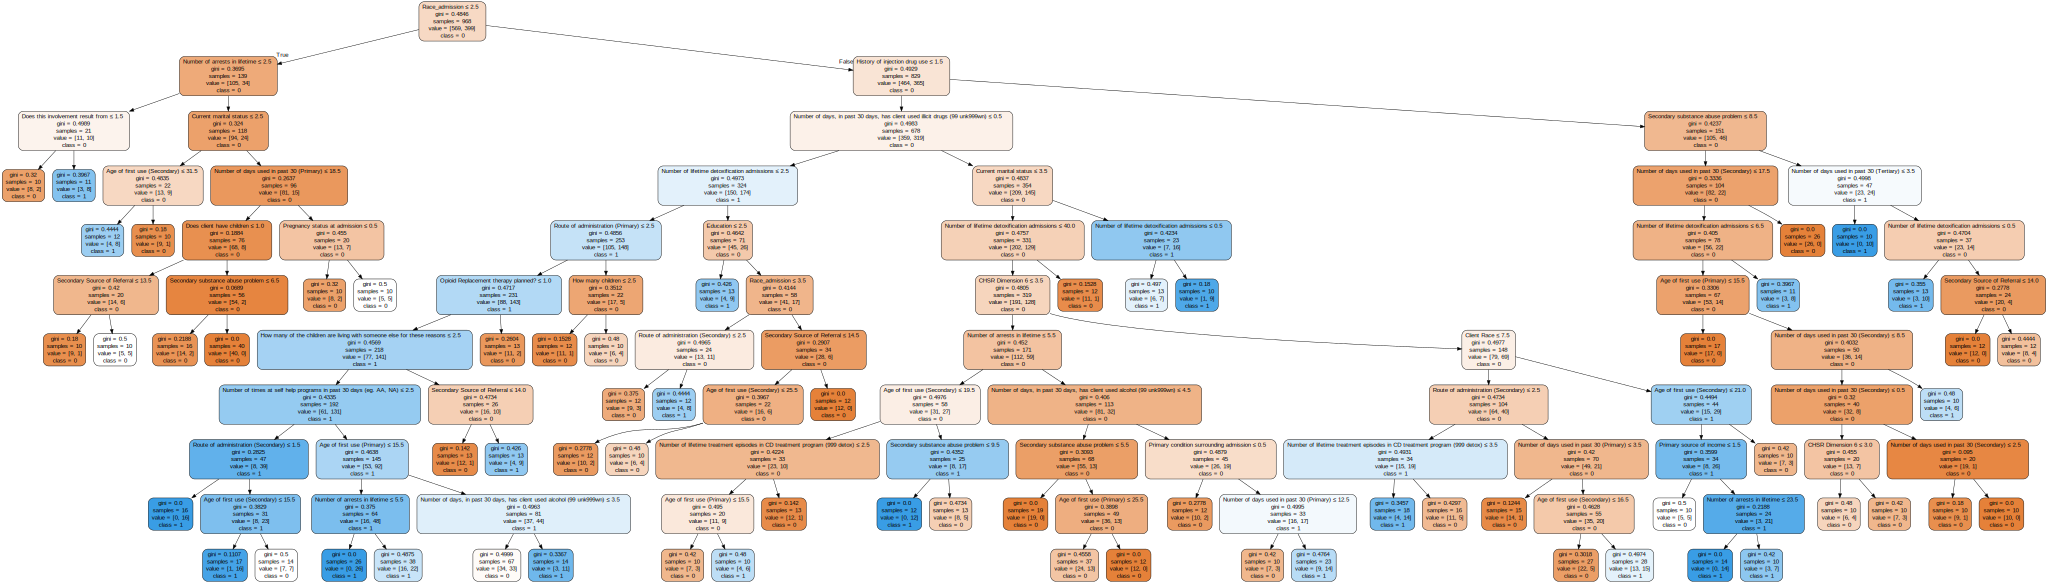

In [105]:
import graphviz
dot_data = tree.export_graphviz(clf_gini, out_file=None,
                                feature_names=features,
                                class_names=['0','1'],
                filled=True, rounded=True,
                special_characters=True)
graph = graphviz.Source(dot_data) 
graph

In [106]:

y_pred = clf_gini.predict(X_test)
y_pred

array([0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1.,
       0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 1.

In [107]:

y_pred_entropy = clf_gini_entropy.predict(X_test)
y_pred_entropy

array([0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 1.

In [108]:
print( accuracy_score(y_test,y_pred)*100)

58.67768595041323


In [109]:
print( accuracy_score(y_test,y_pred_entropy)*100)

59.50413223140496


In [110]:
#